# 문제 1

#### dataset : pima-indians-diabetes-database [kaggle link](pima-indians-diabetes-database) - added post-processing
/kaggle/input/adpkrp5/data1.csv

### 1-1 탐색적 데이터 분석 수행(시각화 포함)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/adpkrp5/data1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# 혹시나 해서 한 번더
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# 기초통계량 확인
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,81.976562,20.536458,79.799479,44.934766,0.471876,34.447917,0.348958
std,3.369578,31.972618,358.835058,15.952218,115.244002,359.739733,0.331329,36.754727,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,9999.000000,99.000000,846.000000,9999.000000,2.420000,999.000000,1.000000


In [5]:
# BloodPressure, BMI, Age에 뭔가 이상치가 조금 있는 것 같음
# 상자그림을 그려봐야겠다.

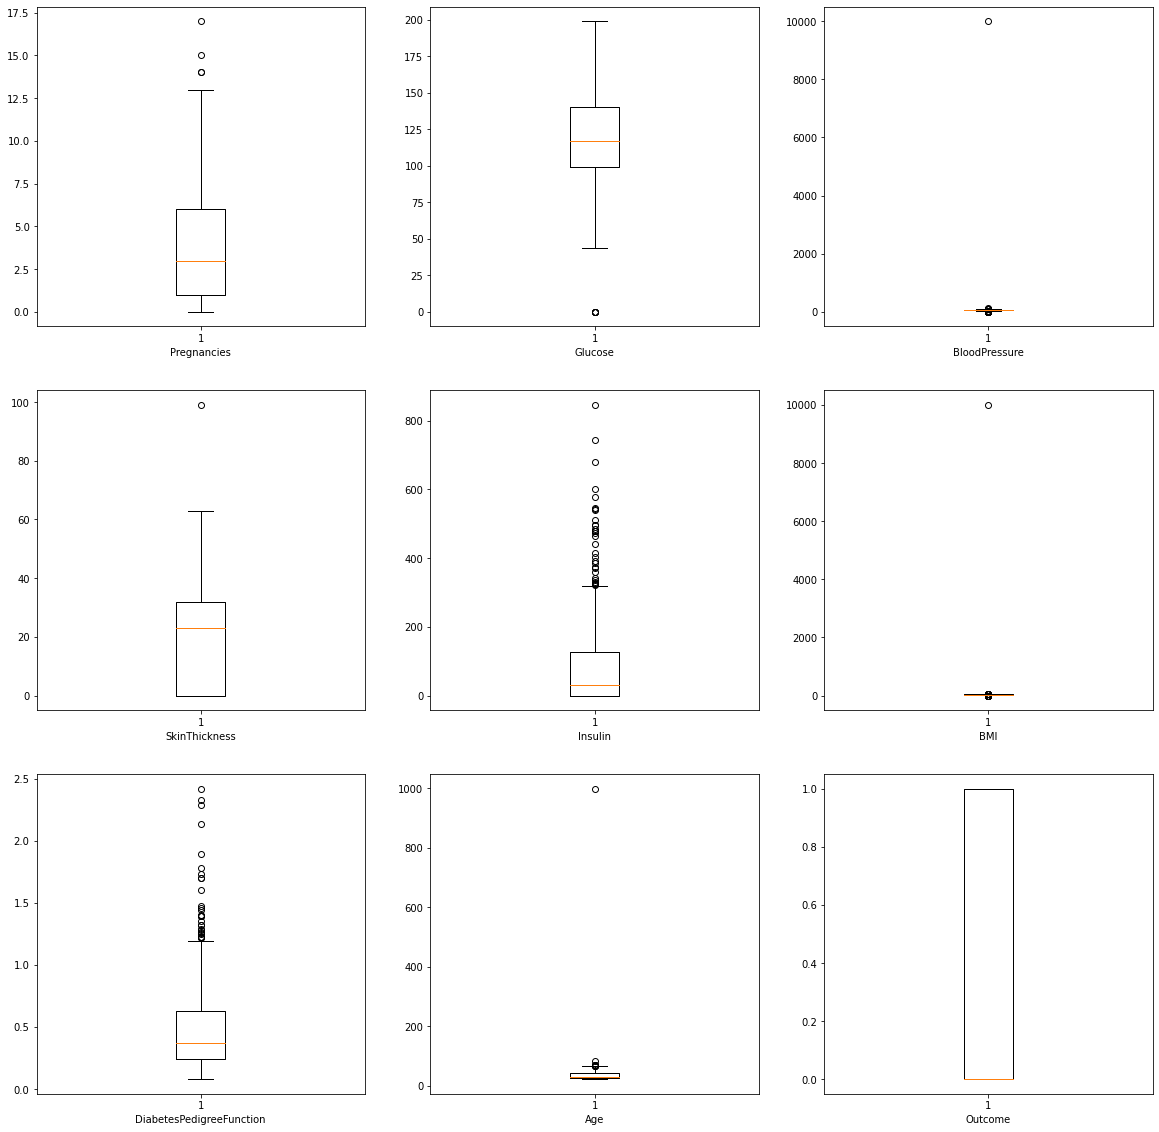

In [6]:
plt.figure(figsize = (20, 20))
plt.subplot(3, 3, 1)
plt.boxplot(df['Pregnancies'])
plt.xlabel('Pregnancies')

plt.subplot(3, 3, 2)
plt.boxplot(df['Glucose'])
plt.xlabel('Glucose')

plt.subplot(3, 3, 3)
plt.boxplot(df['BloodPressure'])
plt.xlabel('BloodPressure')

plt.subplot(3, 3, 4)
plt.boxplot(df['SkinThickness'])
plt.xlabel('SkinThickness')

plt.subplot(3, 3, 5)
plt.boxplot(df['Insulin'])
plt.xlabel('Insulin')

plt.subplot(3, 3, 6)
plt.boxplot(df['BMI'])
plt.xlabel('BMI')

plt.subplot(3, 3, 7)
plt.boxplot(df['DiabetesPedigreeFunction'])
plt.xlabel('DiabetesPedigreeFunction')

plt.subplot(3, 3, 8)
plt.boxplot(df['Age'])
plt.xlabel('Age')

plt.subplot(3, 3, 9)
plt.boxplot(df['Outcome'])
plt.xlabel('Outcome')

plt.show()

일단 이상치있는 건 확인했고, 처리는 1-2번에서 하자.
그리고 이번에는 상관관계를 확인하기 위해 상관계수 히트맵을 그린다.

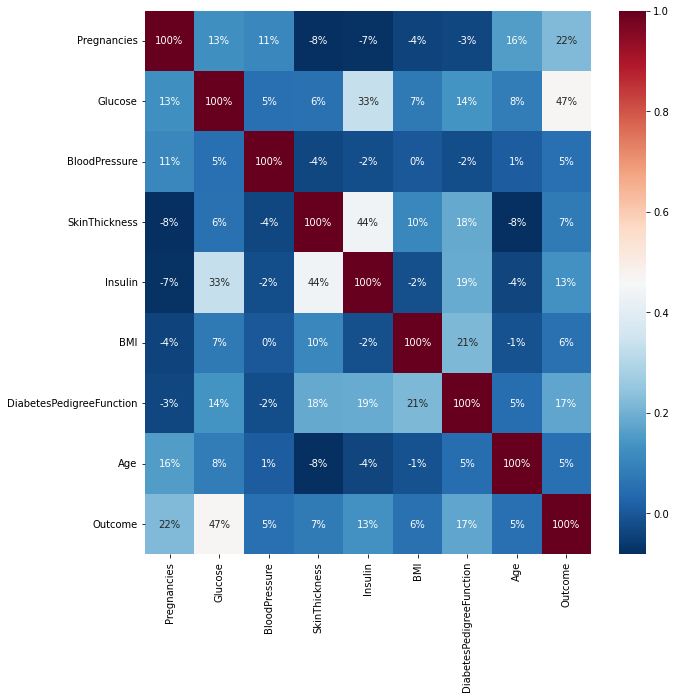

In [7]:
df_corr = df.corr(method = 'pearson')
plt.figure(figsize = (10, 10))
sns.heatmap(df_corr, cmap = 'RdBu_r', annot = True, fmt = '.0%')
plt.show()

상관관계가 큰 것은 보이지 않는다.

따라서 다중공선성은 의심하지 않아도 될 것 같다.

마지막으로 하나씩 히스토그램 그려보기

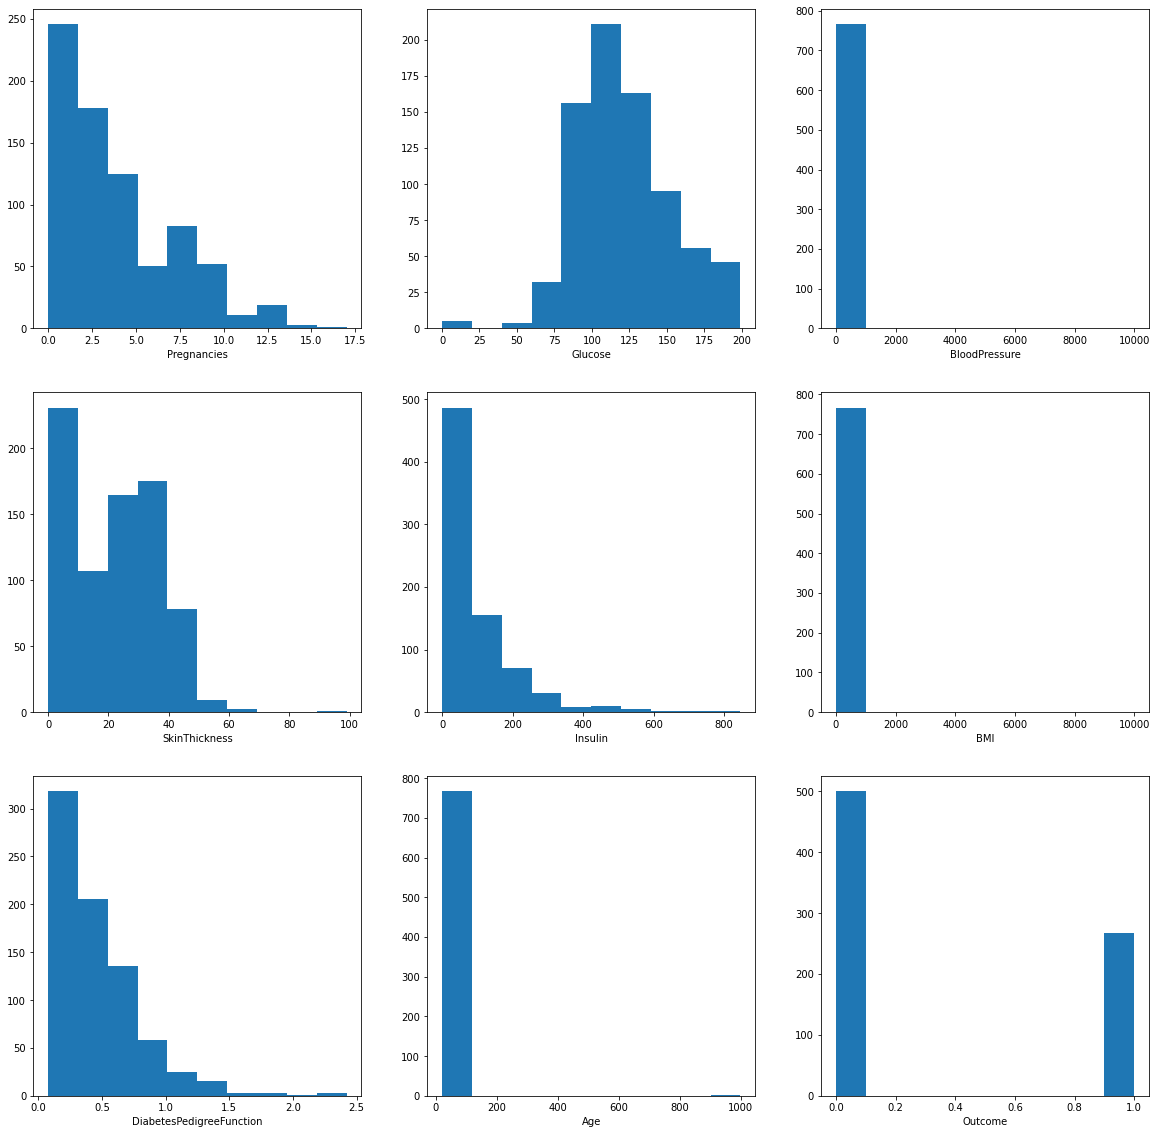

In [8]:
plt.figure(figsize = (20, 20))
for (col, i) in zip(df.columns, range(1, 10)):
    plt.subplot(3, 3, i)
    plt.hist(df[col])
    plt.xlabel(col)
plt.show()

### 1-2 이상치 처리(이상값 대체방안 제시)

* 데이터의 수가 매우 많고 이상치가 존재하는 행이 전체 데이터에 비해 많지 않은 경우 이상치가 존재하는 행 전체를 삭제할 수 있다.
* 만약 대체한다면 변수의 특징에 따라 평균, 중앙값, 최빈값과 같은 대푯값을 선정하여 대체할 수 있다.

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

이번에는 중앙값으로 대체하고자 한다.

이때, 이상치를 제외한 상태에서의 중앙값으로 대체하겠다.

In [10]:
df[df['Outcome'] == 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [11]:
# 수염 내에 있는 데이터 기준으로 중앙값 구하기
df_whis = pd.DataFrame()
low_whis_list = []
upper_whis_list = []

for col in df.columns:
    q1 = df.describe()[col]['25%']
    q3 = df.describe()[col]['75%']
    iqr = q3-q1
    low_whis = q1 - 1.5 * iqr
    low_whis_list.append(low_whis)
    upper_whis = q3 + 1.5 * iqr
    upper_whis_list.append(upper_whis)
    df_whis[col] = df[(df[col] <= upper_whis) & (df[col] >= low_whis)][col]

# 이상치를 필터링하면서 결측치가 생길 가능성이 있어 dropna를 해줘야 한다.
df_whis.dropna(inplace=True)


median_list = []

for col in df_whis.columns:
    median = df_whis[col].median()
    median_list.append(median)
    

print(median_list)
print(low_whis_list)
print(upper_whis_list)
df.describe()

[3.0, 114.0, 72.0, 23.0, 37.0, 32.0, 0.358, 29.0, 0.0]
[-6.5, 37.125, 35.0, -48.0, -190.875, 13.35, -0.32999999999999996, -1.5, -1.5]
[13.5, 202.125, 107.0, 80.0, 318.125, 50.550000000000004, 1.2, 66.5, 2.5]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,81.976562,20.536458,79.799479,44.934766,0.471876,34.447917,0.348958
std,3.369578,31.972618,358.835058,15.952218,115.244002,359.739733,0.331329,36.754727,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,9999.000000,99.000000,846.000000,9999.000000,2.420000,999.000000,1.000000


수염 밖의 값까지 포함한 경우의 중앙값과 같은 경우도 있고, 다른 경우도 있다.

무튼 Outcome을 제외한 나머지 변수의 이상치를 수염 내의 값들에 대한 중앙값으로 대체해주자.

추가로, 각 피처별 값이 0인 경우가 말이 되지 않으므로 이것도 중앙값으로 대체해주자.

In [12]:
for (col, i) in zip(df.columns, range(len(median_list))):
    df[(df[col] < low_whis_list[i]) | (df[col] > upper_whis_list[i]) | (df[col] == 0)] = median_list[i]
    
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.761607,15.505096,8.243378,3.623586,18.018117,3.886477,0.285096,4.166555,0.331919
std,1.850483,45.142012,23.415464,10.221904,54.955686,10.663314,0.202603,11.760667,0.278036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.358000,0.358000,0.358000,0.358000,0.358000,0.358000,0.358000,0.358000,0.358000
75%,0.358000,0.358000,0.358000,0.358000,0.358000,0.358000,0.358000,0.358000,0.358000
max,13.000000,196.000000,106.000000,51.000000,318.000000,49.700000,1.189000,58.000000,1.000000


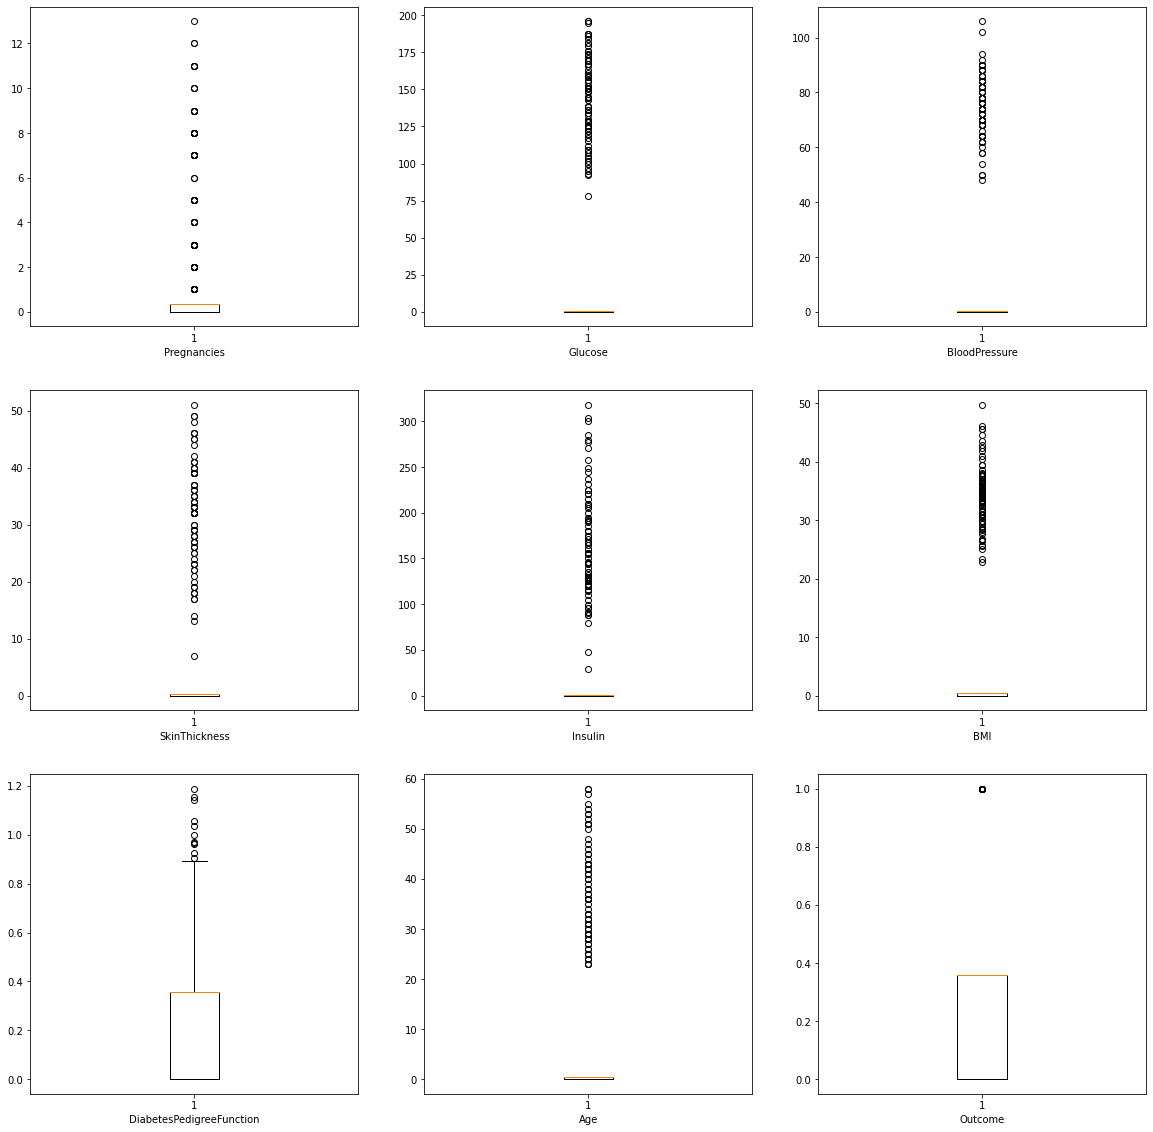

In [13]:
# 다시 상자그림 그려보기
plt.figure(figsize = (20, 20))
plt.subplot(3, 3, 1)
plt.boxplot(df['Pregnancies'])
plt.xlabel('Pregnancies')

plt.subplot(3, 3, 2)
plt.boxplot(df['Glucose'])
plt.xlabel('Glucose')

plt.subplot(3, 3, 3)
plt.boxplot(df['BloodPressure'])
plt.xlabel('BloodPressure')

plt.subplot(3, 3, 4)
plt.boxplot(df['SkinThickness'])
plt.xlabel('SkinThickness')

plt.subplot(3, 3, 5)
plt.boxplot(df['Insulin'])
plt.xlabel('Insulin')

plt.subplot(3, 3, 6)
plt.boxplot(df['BMI'])
plt.xlabel('BMI')

plt.subplot(3, 3, 7)
plt.boxplot(df['DiabetesPedigreeFunction'])
plt.xlabel('DiabetesPedigreeFunction')

plt.subplot(3, 3, 8)
plt.boxplot(df['Age'])
plt.xlabel('Age')

plt.subplot(3, 3, 9)
plt.boxplot(df['Outcome'])
plt.xlabel('Outcome')

plt.show()

### 1-3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

* 어린 사람이 너무 많다. 현업에서 맞는지 논의가 필요하다.
* 나머지 피처들도 이상치가 많아보이는데, 현업 전문가와의 논의가 필요하다.

# 문제 2

### 2-1 오버샘플링 과정 설명하고 결과 작성

### 2-2 언더샘플링 과정 설명하고 결과 작성

### 2-3 둘 중 선택하고 이유 설명

# 문제 3

### 3-1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

### 3-2 모델 비교하고 결과 설명

### 3-3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

# 문제 4 
금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았으며, 분산에 대해 검정을 수행하시오. (유의확률 0.05)

#### dataset : /kaggle/input/adpkrp5/content.csv

### 4-1 연구가설과 귀무가설 작성

### 4-2 양측 검정

### 4-3 검정통계량, 가설 채택

# 문제 5
Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)    
/kaggle/input/adpkrp5/error.csv

### 5-1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

### 5-2 관리도 시각화

# 문제 6
상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다. aa bb aaaa bbbb a b aa bb aa bbb aa bb a b 구매하는 패턴으로 보아 두 상품이 연관이 있는지 확인하라

### 6-1 연구가설과 귀무가설 작성

### 6-2 평균과 표준편차

### 6-3 가설 채택